In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, color, filters

In [3]:
#image = io.imread('colorful_trees.png')
image = io.imread("Media.jpeg")

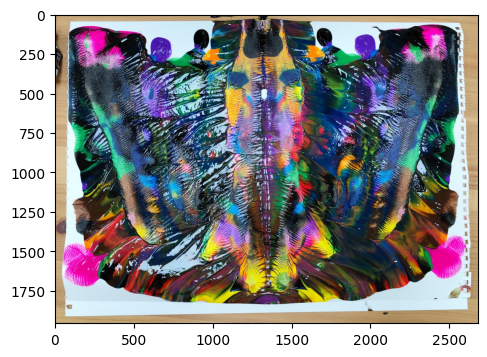

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)

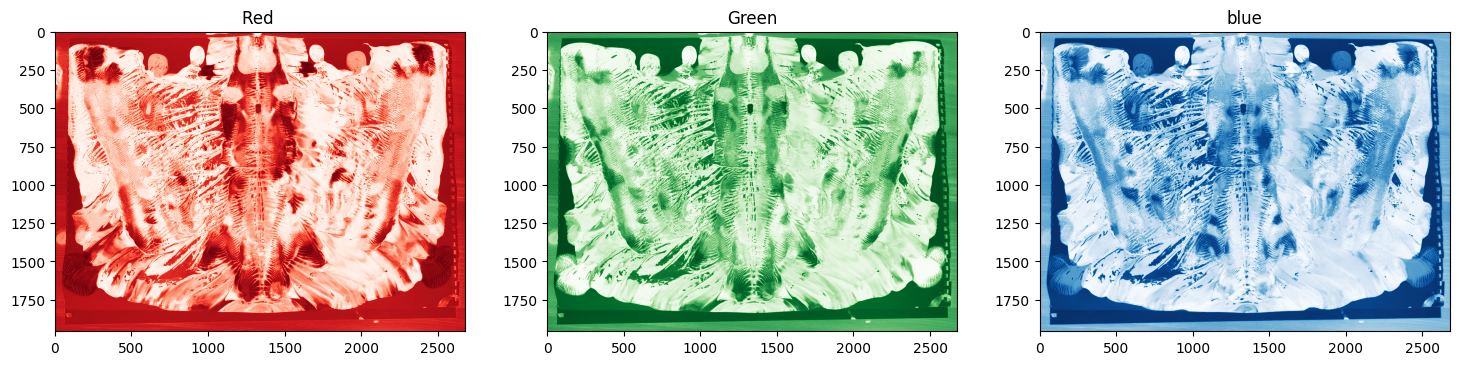

In [5]:
# Separating the image into R, G, B channel using slicing
r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
# plot all the rgb image
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Red ')
plt.imshow(r, cmap='Reds')

plt.subplot(1, 3, 2)
plt.title('Green')
plt.imshow(g, cmap='Greens')

plt.subplot(1, 3, 3)
plt.title('blue')
plt.imshow(b, cmap='Blues')

plt.show()


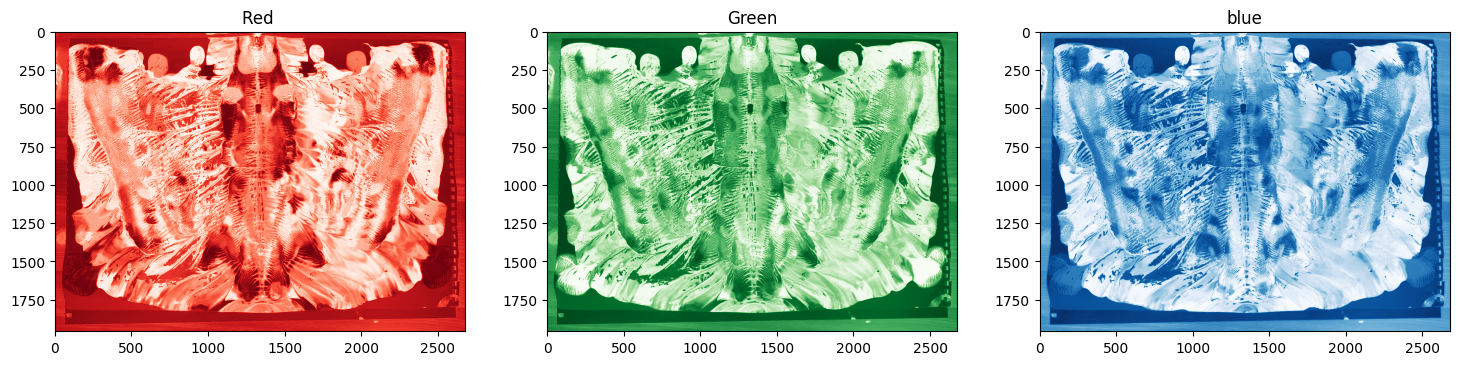

In [6]:
# Applying histogram equalization to each channel separately using equalize_hist function
r_eq = exposure.equalize_hist(r)
g_eq = exposure.equalize_hist(g)
b_eq = exposure.equalize_hist(b)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Red ')
plt.imshow(r_eq, cmap='Reds')

plt.subplot(1, 3, 2)
plt.title('Green')
plt.imshow(g_eq, cmap='Greens')

plt.subplot(1, 3, 3)
plt.title('blue')
plt.imshow(b_eq, cmap='Blues')

plt.show()

In [7]:
# Merging the enhanced channels back into an RGB image using stack
image_eq = np.stack((r_eq, g_eq, b_eq), axis=-1)

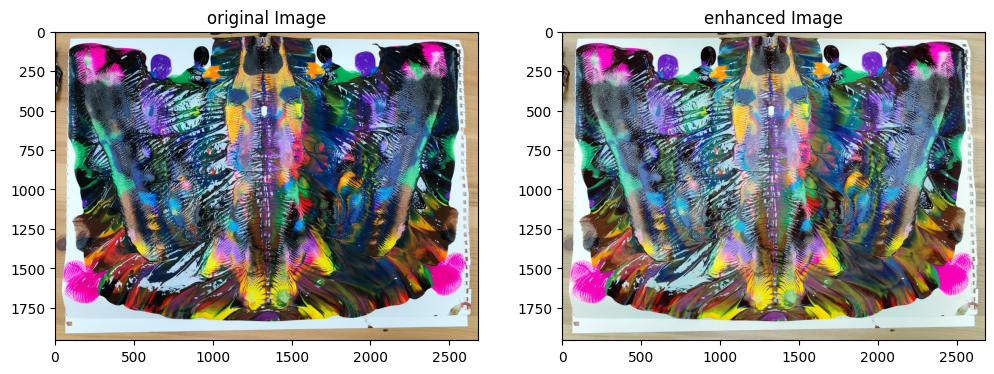

In [8]:
# Display the original and enhanced images side by side for comparison.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('enhanced Image')
plt.imshow(image_eq)

plt.show()

## task 2:

In [9]:
# Checking if the image has an alpha channel and remove it if present (i.e., convert RGBA to RGB)
if image.shape[2] == 4:
    image = image[:, :, :3]



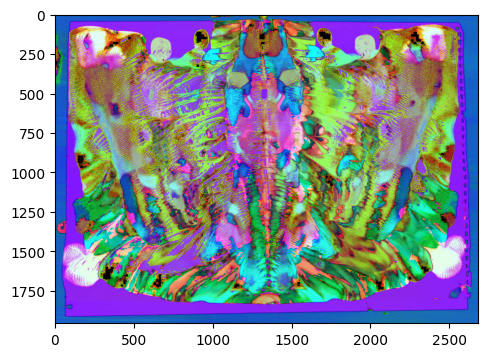

In [10]:
# Converting RGB to HSL (using HSV in skimage) color space
hsl_image = color.rgb2hsv(image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(hsl_image)
plt.show()

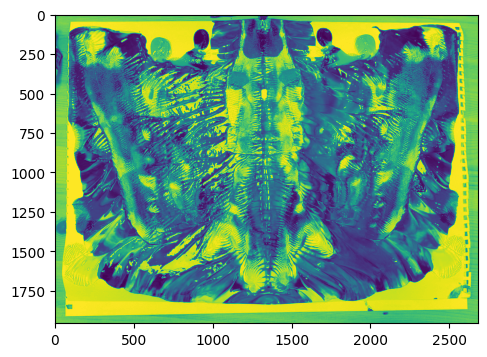

In [11]:
# Extracting the Lightness (L) channel from the HSL image
l_channel = hsl_image[:, :, 2]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(l_channel)
plt.show()

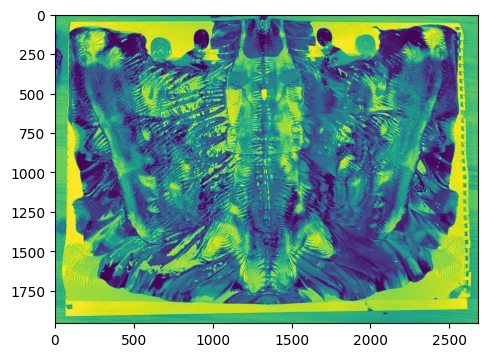

In [12]:
# Applying histogram equalization to the Lightness channel using equalize_hist function
l_channel_eq = exposure.equalize_hist(l_channel)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(l_channel_eq)
plt.show()

In [13]:
# Re-assembling the HSL image with the enhanced Lightness channel
hsl_image[:, :, 2] = l_channel_eq

In [14]:
# Converting the modified HSL image back to RGB color space
image_hsl_eq = color.hsv2rgb(hsl_image)

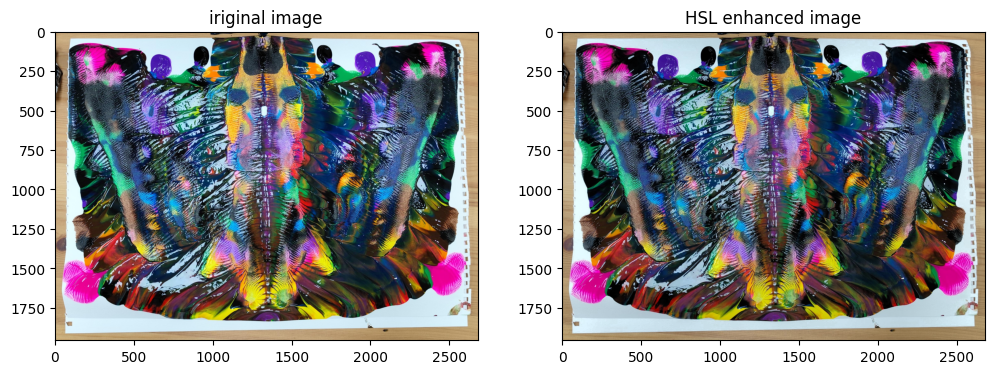

In [15]:
# Displaying the original and HSL-enhanced images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('iriginal image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('HSL enhanced image')
plt.imshow(image_hsl_eq)

plt.show()

## task 3a: Sharpening

In [16]:
# Applying unsharp mask for sharpening the image using the unsharp_mask function with radius=1 and amount=1
sharpened_image = filters.unsharp_mask(image, radius=1, amount=1)

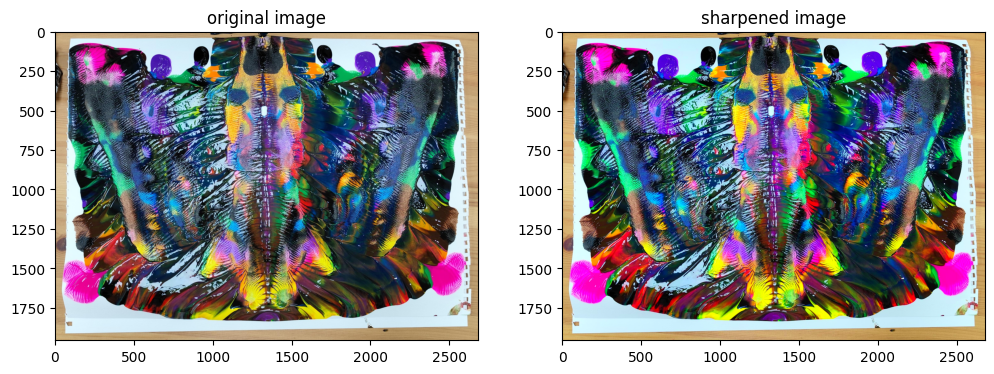

In [18]:
# Display the original and sharpened images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('sharpened image')
plt.imshow(sharpened_image)

plt.show()


## task 3b: Edge Detection

In [19]:
# Convert the image to grayscale for better edge detection
gray_image = color.rgb2gray(image)

In [20]:
# Applying Sobel edge detection filter to the grayscale image
edges = filters.sobel(gray_image)

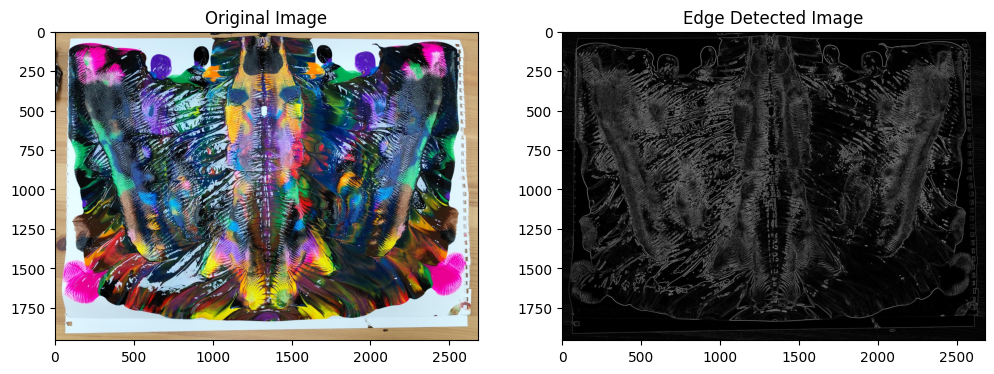

In [21]:
# Display the original and edge-detected images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Edge Detected Image')
plt.imshow(edges, cmap='gray')

plt.show()

## report


This lab is like giving a photo a makeover: it takes a picture and enhances it in different ways to make it look better.

First, it loads any picture. Then, it shows the original picture on one side. It splits the picture into its basic colors (red, green, and blue) and improves each color separately to make them look better, using histogram equalization. After that, it combines the improved colors back and shows this enhanced version of the picture.

Next for the HSL, it checks if the image has an extra, unneeded part (like alpha channel) and removes it if necessary. Then it then changes the picture’s color style to a different format (called HSL), focuses on improving how light or dark it looks, and converts it back to its usual color style.

Then, lasttly sharpens the image so it looks clearer and more well-defined. After that, it detects the edges in the picture (kinda like tracing the outlines of things in the photo) and shows this “edged” version. Throughout all this, the original picture is displayed alongside the modified versions for comparison.